In [27]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [28]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Euler_Num.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,7,5,6,6,4,2,3,5,4,12,...,3,0,1,61,29,10,7,8,7,1
1,17,31,37,26,24,29,9,10,16,8,...,5,5,6,11,5,4,7,3,4,1
2,41,37,29,31,34,30,36,41,34,22,...,39,44,49,50,11,62,36,48,41,1
3,91,82,50,34,67,44,34,48,38,22,...,24,5,2,37,41,15,16,12,12,1
4,26,23,60,62,50,54,20,25,63,56,...,20,26,28,42,49,62,53,22,17,1


In [29]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
# std=MinMaxScaler()
# X_train=std.fit_transform(X_train)
# x_test=std.fit_transform(x_test)

In [30]:
clf = svm.OneClassSVM(kernel='poly',nu=0.5)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7446808510638298
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82       101
           1       0.55      0.55      0.55        40

    accuracy                           0.74       141
   macro avg       0.69      0.69      0.69       141
weighted avg       0.74      0.74      0.74       141



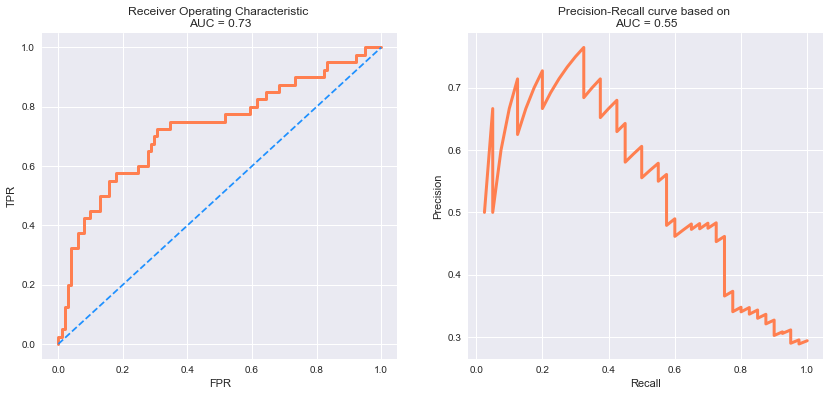

In [31]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()